In [1]:
# we import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sklearn
from scipy import stats

In [2]:
dataset = pd.read_excel("Production Data.xlsx")
x = dataset.iloc[6:90000,[0,-1]].values

In [3]:
x

array([[datetime.datetime(2018, 7, 1, 6, 45), 3],
       [datetime.datetime(2018, 7, 1, 7, 0), 8],
       [datetime.datetime(2018, 7, 1, 7, 15), 13],
       ...,
       [datetime.datetime(2020, 11, 12, 23, 15), 0],
       [datetime.datetime(2020, 11, 12, 23, 30), 0],
       [datetime.datetime(2020, 11, 12, 23, 45), 0]], dtype=object)

In [4]:
data = pd.DataFrame(x, columns =['time','total Energy'])

In [5]:
data

,time,total Energy
0,2018-07-01 06:45:00,3
1,2018-07-01 07:00:00,8
2,2018-07-01 07:15:00,13
3,2018-07-01 07:30:00,18
4,2018-07-01 07:45:00,18
...,...,...
82984,2020-11-12 22:45:00,0
82985,2020-11-12 23:00:00,0
82986,2020-11-12 23:15:00,0
82987,2020-11-12 23:30:00,0


In [6]:
data.dtypes

time            datetime64[ns]
total Energy            object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82989 entries, 0 to 82988
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          82989 non-null  datetime64[ns]
 1   total Energy  82989 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.3+ MB


In [8]:
data.describe()

,time,total Energy
count,82989,82989.0
unique,82989,349.0
top,2019-08-01 18:30:00,0.0
freq,1,42851.0
first,2018-07-01 06:45:00,NaN
last,2020-11-12 23:45:00,NaN


In [9]:
data.head()

,time,total Energy
0,2018-07-01 06:45:00,3
1,2018-07-01 07:00:00,8
2,2018-07-01 07:15:00,13
3,2018-07-01 07:30:00,18
4,2018-07-01 07:45:00,18


In [10]:
data.min()

time            2018-07-01 06:45:00
total Energy               -61.1667
dtype: object

In [11]:
data.isna().count()

time            82989
total Energy    82989
dtype: int64

In [12]:
data.isnull().count

<bound method DataFrame.count of         time  total Energy
0      False         False
1      False         False
2      False         False
3      False         False
4      False         False
...      ...           ...
82984  False         False
82985  False         False
82986  False         False
82987  False         False
82988  False         False

[82989 rows x 2 columns]>

In [13]:
data1= data[data['total Energy']>1]

In [14]:
data1.min()

time            2018-07-01 06:45:00
total Energy                      2
dtype: object

In [15]:
data1 = data1[data1['total Energy']<500]

In [16]:
data1.min()

time            2018-07-01 06:45:00
total Energy                      2
dtype: object

In [17]:
data1.describe()

,time,total Energy
count,36515,36515.0
unique,36515,333.0
top,2019-08-01 18:30:00,3.0
freq,1,767.0
first,2018-07-01 06:45:00,NaN
last,2020-11-12 15:45:00,NaN


In [18]:
data1.head()

,time,total Energy
0,2018-07-01 06:45:00,3
1,2018-07-01 07:00:00,8
2,2018-07-01 07:15:00,13
3,2018-07-01 07:30:00,18
4,2018-07-01 07:45:00,18


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 82956
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          36515 non-null  datetime64[ns]
 1   total Energy  36515 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 855.8+ KB


In [20]:
data1.index = data1['time']
del data1['time']

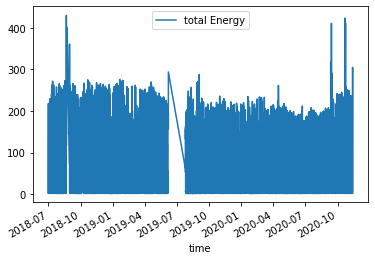

In [21]:
data1.dropna()
data1.plot()

In [22]:
data1 = data1.iloc[1:,0].apply(pd.to_numeric)

In [23]:
data1 = data1.resample('D').std()

In [24]:
type(data1)

pandas.core.series.Series

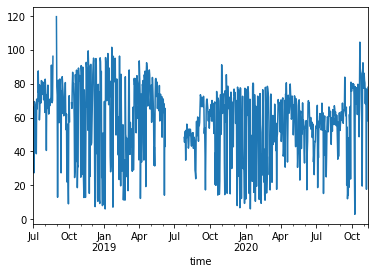

In [25]:
data1.plot()

In [26]:
data1.isnull().count()
data1.dropna()

time
2018-07-01    56.887316
2018-07-02    66.199200
2018-07-03    27.348859
2018-07-04    69.536387
2018-07-05    68.985219
                ...    
2020-11-08    17.636914
2020-11-09    76.720856
2020-11-10    65.586110
2020-11-11    58.166602
2020-11-12    77.947586
Name: total Energy, Length: 806, dtype: float64

In [27]:
data1 = pd.DataFrame(data1)

In [28]:
data1

,total Energy
time,
2018-07-01,56.887316
2018-07-02,66.199200
2018-07-03,27.348859
2018-07-04,69.536387
2018-07-05,68.985219
...,...
2020-11-08,17.636914
2020-11-09,76.720856
2020-11-10,65.586110


In [29]:
data1.isna().any()

total Energy    True
dtype: bool

In [30]:
data1 = data1.dropna()

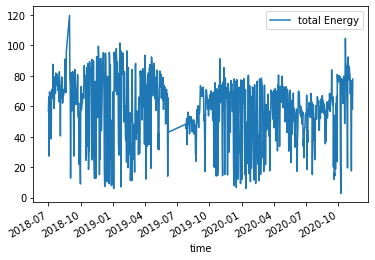

In [31]:
data1.plot()

In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 806 entries, 2018-07-01 to 2020-11-12
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total Energy  806 non-null    float64
dtypes: float64(1)
memory usage: 12.6 KB


In [33]:
data1

,total Energy
time,
2018-07-01,56.887316
2018-07-02,66.199200
2018-07-03,27.348859
2018-07-04,69.536387
2018-07-05,68.985219
...,...
2020-11-08,17.636914
2020-11-09,76.720856
2020-11-10,65.586110


In [34]:
data1['Days']= data1.index.strftime('%Y%m%d')

C:\Users\mailo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
data1['TE'] = data1['total Energy']

C:\Users\mailo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
data1

,total Energy,Days,TE
time,,,
2018-07-01,56.887316,20180701,56.887316
2018-07-02,66.199200,20180702,66.199200
2018-07-03,27.348859,20180703,27.348859
2018-07-04,69.536387,20180704,69.536387
2018-07-05,68.985219,20180705,68.985219
...,...,...,...
2020-11-08,17.636914,20201108,17.636914
2020-11-09,76.720856,20201109,76.720856
2020-11-10,65.586110,20201110,65.586110


In [37]:
del (data1['total Energy'])


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 806 entries, 2018-07-01 to 2020-11-12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Days    806 non-null    object 
 1   TE      806 non-null    float64
dtypes: float64(1), object(1)
memory usage: 18.9+ KB


In [39]:
data1.isna().any()
data1.dropna()

,Days,TE
time,,
2018-07-01,20180701,56.887316
2018-07-02,20180702,66.199200
2018-07-03,20180703,27.348859
2018-07-04,20180704,69.536387
2018-07-05,20180705,68.985219
...,...,...
2020-11-08,20201108,17.636914
2020-11-09,20201109,76.720856
2020-11-10,20201110,65.586110


In [40]:
data1.isnull().any()

Days    False
TE      False
dtype: bool

In [41]:
data1.isna().any()

Days    False
TE      False
dtype: bool

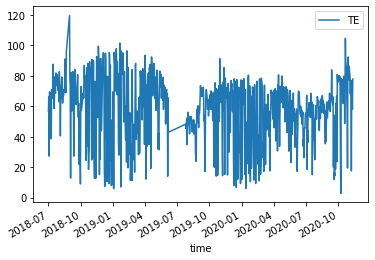

In [42]:
data1.plot()

In [43]:
data1

,Days,TE
time,,
2018-07-01,20180701,56.887316
2018-07-02,20180702,66.199200
2018-07-03,20180703,27.348859
2018-07-04,20180704,69.536387
2018-07-05,20180705,68.985219
...,...,...
2020-11-08,20201108,17.636914
2020-11-09,20201109,76.720856
2020-11-10,20201110,65.586110


In [44]:
data2 = data1

In [45]:
data1['seq'] = range(1,807)
data1['T.E'] = data1['TE']
del data1['TE']

C:\Users\mailo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mailo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
data1

,Days,seq,T.E
time,,,
2018-07-01,20180701,1,56.887316
2018-07-02,20180702,2,66.199200
2018-07-03,20180703,3,27.348859
2018-07-04,20180704,4,69.536387
2018-07-05,20180705,5,68.985219
...,...,...,...
2020-11-08,20201108,802,17.636914
2020-11-09,20201109,803,76.720856
2020-11-10,20201110,804,65.586110


In [47]:
 del data1['Days']

In [48]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data1= s.fit_transform(data1)


In [49]:
data1

array([[-1.72990319, -0.05656068],
       [-1.7256053 ,  0.38077018],
       [-1.7213074 , -1.44382868],
       ...,
       [ 1.7213074 ,  0.35197654],
       [ 1.7256053 ,  0.00352076],
       [ 1.72990319,  0.93253094]])

In [50]:
#data1

In [51]:
#data1 =pd.DataFrame(data1)
data1

array([[-1.72990319, -0.05656068],
       [-1.7256053 ,  0.38077018],
       [-1.7213074 , -1.44382868],
       ...,
       [ 1.7213074 ,  0.35197654],
       [ 1.7256053 ,  0.00352076],
       [ 1.72990319,  0.93253094]])

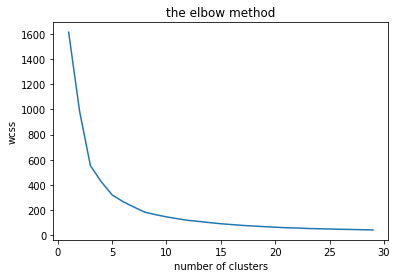

In [52]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30,1):
  kmeans = KMeans(n_clusters = i,init='k-means++',random_state = 42)
  kmeans.fit(data1)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,30),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [53]:
kmeans = KMeans(n_clusters = 8,init='k-means++',random_state = 42)
y_kmeans= kmeans.fit_predict(data1)

In [54]:
print(s.inverse_transform(data1))
kmeans.predict(data1)
print(data2)

[[  1.          56.88731552]
 [  2.          66.19919963]
 [  3.          27.34885897]
 ...
 [804.          65.58610997]
 [805.          58.1666019 ]
 [806.          77.94758643]]
            seq        T.E
time                      
2018-07-01    1  56.887316
2018-07-02    2  66.199200
2018-07-03    3  27.348859
2018-07-04    4  69.536387
2018-07-05    5  68.985219
...         ...        ...
2020-11-08  802  17.636914
2020-11-09  803  76.720856
2020-11-10  804  65.586110
2020-11-11  805  58.166602
2020-11-12  806  77.947586

[806 rows x 2 columns]


In [55]:
plt.scatter(s.inverse_transform(data1[y_kmeans==0,0]), s.inverse_transform(data1[y_kmeans==0, 1]), s = 50, c='red',label='Cluster 1')
plt.scatter(s.inverse_transform(data1[y_kmeans==1,0]), s.inverse_transform(data1[y_kmeans==1, 1]), s = 50, c='blue',label='Cluster 2')
plt.scatter(s.inverse_transform(data1[y_kmeans==2,0]), s.inverse_transform(data1[y_kmeans==2, 1]), s = 50, c='green',label='Cluster 3')
plt.scatter(s.inverse_transform(data1[y_kmeans==3,0]), s.inverse_transform(data1[y_kmeans==3, 1]), s = 50, c='cyan',label='Cluster 4')
plt.scatter(s.inverse_transform(data1[y_kmeans==4,0]), s.inverse_transform(data1[y_kmeans==4, 1]), s = 50, c='red',label='Cluster 5')
plt.scatter(s.inverse_transform(data1[y_kmeans==5,0]), s.inverse_transform(data1[y_kmeans==5, 1]), s = 50, c='red',label='Cluster 6')
plt.scatter(s.inverse_transform(data1[y_kmeans==6,0]), s.inverse_transform(data1[y_kmeans==6, 1]), s = 50, c='red',label='Cluster 7')
plt.scatter(s.inverse_transform(data1[y_kmeans==7,0]), s.inverse_transform(data1[y_kmeans==7, 1]), s = 50, c='red',label='Cluster 8')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroid')

plt.title('solar data cluster')
plt.xlabel('days')
plt.ylabel('total Energy')
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (118,) (2,) (118,) 

In [56]:
print(s.inverse_transform(data1[y_kmeans==1]))

[[  1.          56.88731552]
 [  2.          66.19919963]
 [  4.          69.53638719]
 [  5.          68.98521876]
 [  6.          67.32023852]
 [  7.          62.33502147]
 [  8.          47.24460932]
 [ 10.          70.97183963]
 [ 11.          65.17988395]
 [ 12.          69.60270314]
 [ 13.          69.65535603]
 [ 15.          74.78350951]
 [ 16.          79.54435478]
 [ 17.          58.66205396]
 [ 18.          63.8986691 ]
 [ 19.          79.03895549]
 [ 20.          77.25586761]
 [ 21.          68.68799487]
 [ 22.          81.91681622]
 [ 23.          81.65467216]
 [ 24.          73.72281177]
 [ 25.          76.79517987]
 [ 26.          81.02412782]
 [ 27.          78.5792104 ]
 [ 28.          70.56981855]
 [ 29.          78.56633555]
 [ 30.          76.79067539]
 [ 31.          63.09343564]
 [ 32.          82.76048292]
 [ 33.          76.60254467]
 [ 34.          71.97121865]
 [ 36.          73.62823691]
 [ 37.          65.43937818]
 [ 38.          70.12990093]
 [ 39.        

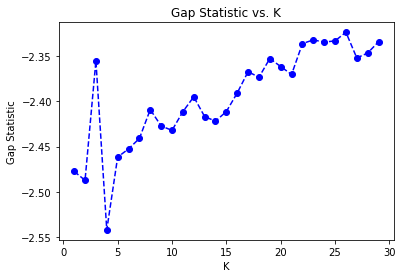

In [57]:
#Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(data1, nrefs=5, maxClusters=30)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

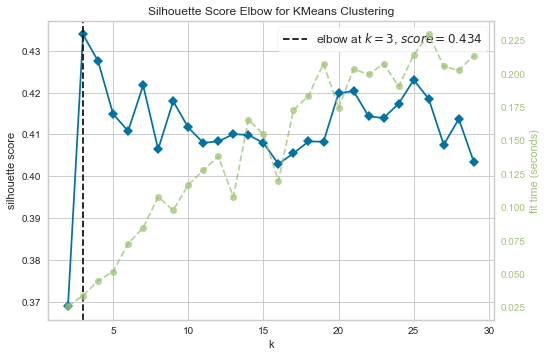

In [58]:
# Silhouette Score for K means
#import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(data1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


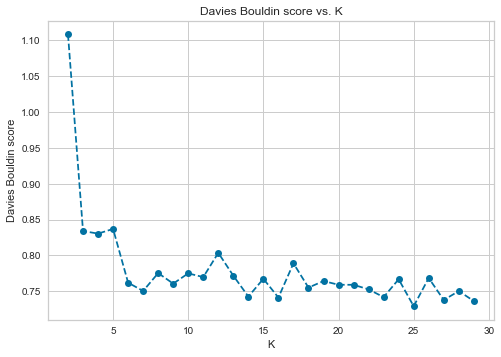

In [59]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data1)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data1, model)
    
    return score
scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(data1, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

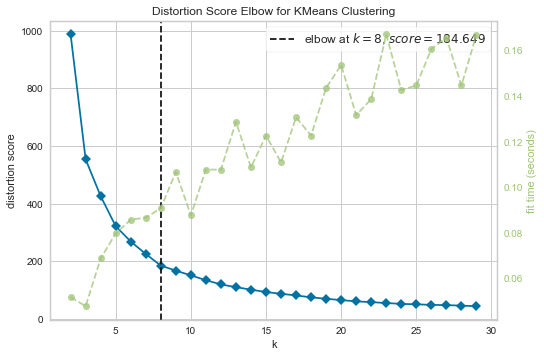

In [60]:
# Elbow Method for K means
import yellowbrick
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(data1)        # Fit data to visualizer
visualizer.show()  